# Classical simulation of quantum dots

In this file we show some of the capabilities of the `ClassicalDotSystem`, which can simulate simple quantum dot systems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qtt.simulation.classicaldotsystem import ClassicalDotSystem, TripleDot

We define a linear triple-dot system using the `TripleDot` class, which inherits from the `ClassicalDotSystem`.

In [2]:
test_dot = TripleDot()

The function `calculate_ground_state` calculates the number of electrons in the ground state for given values of the voltages on the gates forming the dots.

In [3]:
temp_state = test_dot.calculate_ground_state(np.array([0,0,0]));
print(temp_state)
temp_state = test_dot.calculate_ground_state(np.array([120,0,100]));
print(temp_state)

[0 0 0]
[1 0 1]


In [4]:
# make a test gate plane
nx = 150
ny = 150
test2Dparams = np.zeros((3,nx,ny))
sweepx = np.linspace(0, 300, nx)
sweepy = np.linspace(0, 300, ny)
xv, yv = np.meshgrid(sweepx, sweepy)
test2Dparams[0] = xv+.1*yv
xv, yv = np.meshgrid(sweepy, sweepx)
test2Dparams[1] = .1*xv+yv

# run the honeycomb simulation
test_dot.simulate_honeycomb(test2Dparams, multiprocess=False, verbose=1)

simulatehoneycomb: 0/150
simulatehoneycomb: 0.48 [s]


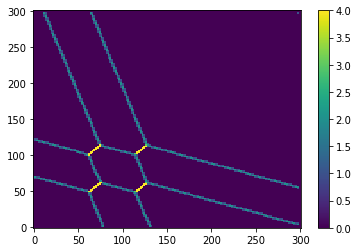

In [5]:
plt.pcolor(sweepx,sweepy,test_dot.honeycomb, shading='auto')
plt.colorbar()
plt.show()

simulatehoneycomb: 0/150
simulatehoneycomb: 0.47 [s]


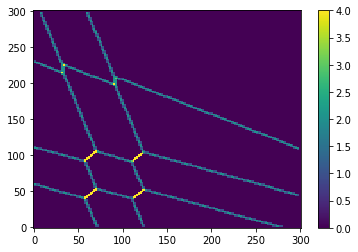

In [6]:
test2Dparams[2] = 103

# run the honeycomb simulation again
test_dot.simulate_honeycomb(test2Dparams, multiprocess=False, verbose=1)
plt.pcolor(sweepx,sweepy,test_dot.honeycomb, shading='auto')
plt.colorbar()
plt.show()

## Defining your own system

In [7]:
class TestDot(ClassicalDotSystem):
    def __init__(self, name='testdot', **kwargs):
        super().__init__(name=name, ndots=3, ngates=3, maxelectrons=2, **kwargs)

        vardict = {}

        vardict["mu0_values"] = np.array([-27.0, -20.0, -25.0])  # chemical potential at zero gate voltage
        vardict["Eadd_values"] = np.array([54.0, 52.8, 54.0])  # addition energy
        vardict["W_values"] = np.array([12.0, 5.0, 10.0])  # inter-site Coulomb repulsion (!order is important: (1,2), (1,3), (2,3)) (lexicographic ordering)
        vardict["alpha_values"] = np.array([[1.0, 0.25, 0.1],
                                 [0.25, 1.0, 0.25],
                                 [0.1, 0.25, 1.0]])

        for name in self.varnames:
            setattr(self, name, vardict[name+'_values'])

In [8]:
test_dot_2 = TestDot()

# make a test gate plane
nx = 10
ny = 10
test2Dparams = np.zeros((test_dot_2.ngates,nx,ny))

sweepx = np.linspace(-100, 460, nx)
sweepy = np.linspace(-100, 500, ny)
xv, yv = np.meshgrid(sweepx, sweepy)
test2Dparams[0] = xv+.1*yv
xv, yv = np.meshgrid(sweepy, sweepx)
test2Dparams[2] = .1*xv+yv

# run the honeycomb simulation
test_dot_2.simulate_honeycomb(test2Dparams, multiprocess=False)

simulatehoneycomb: 0/10
simulatehoneycomb: 0.00 [s]


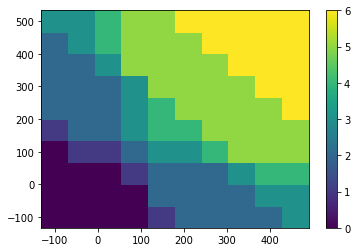

In [9]:
plt.clf()
plt.pcolor(sweepx,sweepy,test_dot_2.hcgs.sum(axis=2), shading='auto')
plt.colorbar()
plt.show()

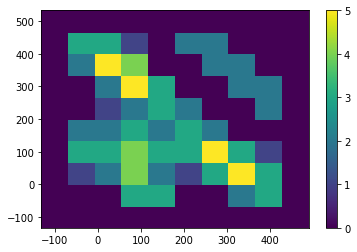

In [10]:
plt.clf()
plt.pcolor(sweepx,sweepy,test_dot_2.honeycomb, shading='auto')
plt.colorbar()
plt.show()